In [19]:
# import libraries
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# read data
header = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']
df = pd.read_csv('car.data', names=header)
print(df)
df.info()

     buying  maint  doors persons lug_boot safety  label
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   ob

In [21]:
# Duplicate dataframe
unique_values = (df['buying'].unique())[::-1]
print(unique_values)

['low' 'med' 'high' 'vhigh']


In [22]:
# Convert Categorical data to numerical data
le = LabelEncoder()

# encoding to each categorical column
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# printing df
print(df.head())
print(df.tail())

   buying  maint  doors  persons  lug_boot  safety  label
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2
      buying  maint  doors  persons  lug_boot  safety  label
1723       1      1      3        2         1       2      1
1724       1      1      3        2         1       0      3
1725       1      1      3        2         0       1      2
1726       1      1      3        2         0       2      1
1727       1      1      3        2         0       0      3


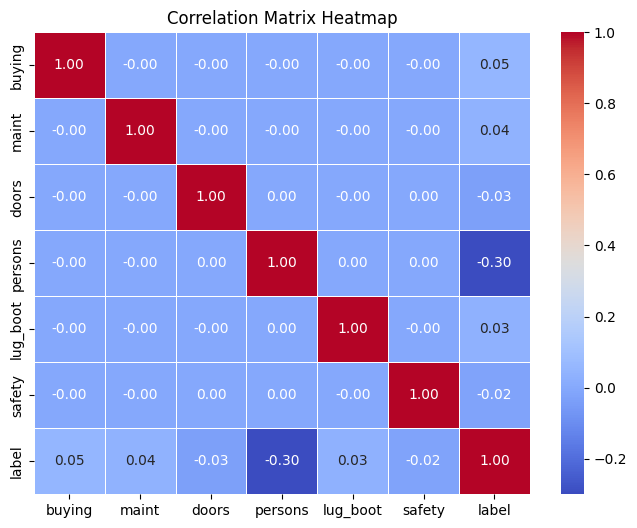

In [23]:
# form correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

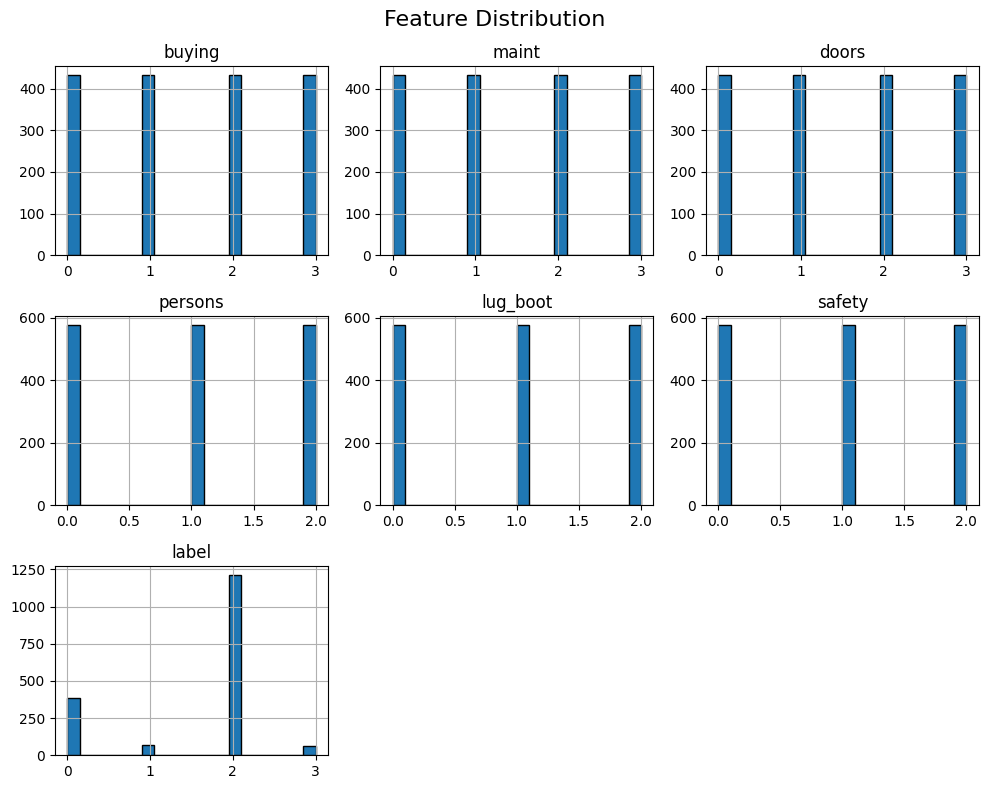

In [24]:
# Histogram to see distribution
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distribution", fontsize=16)
plt.tight_layout()
plt.show()

In [32]:
# import libs for model training
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Split data
X = df.drop(columns=["buying", "persons"])
y = df["buying"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X


,maint,doors,lug_boot,safety,label
0,3,0,2,1,2
1,3,0,2,2,2
2,3,0,2,0,2
3,3,0,1,1,2
4,3,0,1,2,2
...,...,...,...,...,...
1723,1,3,1,2,1
1724,1,3,1,0,3
1725,1,3,0,1,2
1726,1,3,0,2,1


In [33]:
# Model Training
# Initialize the model
svm = SVC(random_state=42, kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [34]:
# Predict and evaluate
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.26


In [36]:
import joblib
# Save the model
joblib.dump(svm, "random_forest_model.pkl")

['random_forest_model.pkl']

In [37]:
# Predict buying price
# Load the model
svm_loaded = joblib.load("random_forest_model.pkl")

In [38]:
# Data for testing
# test: maint:high, doors:4, lug_boot:big, safety:high
test = ['high', '4', 'big', 'high', 'good']

# Convert to DataFrame
enc = le.fit_transform(test)
enc_test = pd.DataFrame([enc], columns=['maint', 'doors','lug_boot', 'safety', 'label'])
enc_test

,maint,doors,lug_boot,safety,label
0,3,0,1,3,2


In [39]:
pred = svm_loaded.predict(enc_test)
pred_convert = unique_values[pred]
print(pred)
print(pred_convert)

[3]
['vhigh']
